# Data Cleaning 
- Addressing **missing values, outliers, and inconsistencies**.
- This step ensures the data's quality before analysis. 
- Understand the **structure** and **quality** of the data through exploration and prepare it for further analysis. **Exploratory Data Analysis (EDA)** 

## 1.Forest Cover
- Annual Tree Cover Loss
- Treecover Loss
- Tree cover Extent


In [74]:
# importations
import description as dp

### Read Data (Forest Cover)

**NOTE**: Forest Cover
- **Tree cover** is defined as all vegetation taller than 5 meters in height as of 2000. The tree cover data set is a collaboration of the University of Maryland, Google, USGS, and NASA, and uses Landsat satellite images to map tree cover globally for the years 2000 and 2010 at 30-meter resolution. 
- Note that *“tree cover”* is the biophysical presence of trees and may take the form of natural forests or plantations existing over a range of canopy densities.

#### Focuses on the Annual Tree cover loss by dominant driver in Kenya

In [70]:
forest_cover_loss = dp.readCSV("data/Forest Cover/Annual tree cover loss by dominant driver in Kenya/treecover_loss__ha.csv") 
forest_cover_extent = dp.readCSV("data/Forest Cover/Annual tree cover loss by dominant driver in Kenya/treecover_extent_2000__ha.csv")

### Overview of into the data

- Overview of Data using df.head()
- Checking Data types
- Checking the dimension of the data

In [75]:
dp.decribeData(forest_cover_loss)

OverView Of Data
  tsc_tree_cover_loss_drivers__driver  umd_tree_cover_loss__year  \
0                             Unknown                       2012   
1                            Forestry                       2021   
2                Shifting agriculture                       2019   
3                            Forestry                       2020   
4                             Unknown                       2019   

   umd_tree_cover_loss__ha  gfw_gross_emissions_co2e_all_gases__Mg  
0               270.305210                            8.048608e+04  
1               103.917887                            9.014521e+04  
2             14614.369913                            6.670329e+06  
3               490.616006                            2.383159e+05  
4               114.893385                            4.442652e+04  
Data Types
tsc_tree_cover_loss_drivers__driver        object
umd_tree_cover_loss__year                   int64
umd_tree_cover_loss__ha                   float64

In [68]:
forest_cover_loss.head()

,tsc_tree_cover_loss_drivers__driver,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
0,Unknown,2012,270.305210,8.048608e+04
1,Forestry,2021,103.917887,9.014521e+04
2,Shifting agriculture,2019,14614.369913,6.670329e+06
3,Forestry,2020,490.616006,2.383159e+05
4,Unknown,2019,114.893385,4.442652e+04


In [9]:
forest_cover_extent.head()

<bound method NDFrame.head of    iso  umd_tree_cover_extent_2000__ha      area__ha
0  KEN                    3.319483e+06  5.859834e+07>

### Checking for the data types

In [65]:
forest_cover_extent.dtypes

iso                                object
umd_tree_cover_extent_2000__ha    float64
area__ha                          float64
dtype: object


In [11]:
forest_cover_loss.dtypes

tsc_tree_cover_loss_drivers__driver        object
umd_tree_cover_loss__year                   int64
umd_tree_cover_loss__ha                   float64
gfw_gross_emissions_co2e_all_gases__Mg    float64
dtype: object

### Understanding the Shape of the Forest Cover Data

In [12]:
forest_cover_loss.shape

(132, 4)

In [13]:
forest_cover_extent.shape

(1, 3)

### Statistical Summary of the Forest Cover Data

In [15]:
forest_cover_loss.describe()

,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg
count,132.000000,132.000000,1.320000e+02
mean,2011.500000,2841.117428,1.395906e+06
std,6.368458,6032.652721,2.989859e+06
min,2001.000000,25.579869,6.880135e+03
25%,2006.000000,126.041695,5.074765e+04
50%,2011.500000,245.179269,1.005047e+05
75%,2017.000000,492.886238,2.871572e+05
max,2022.000000,24213.043111,1.211022e+07


In [16]:
forest_cover_extent.describe()

,umd_tree_cover_extent_2000__ha,area__ha
count,1.000000e+00,1.000000e+00
mean,3.319483e+06,5.859834e+07
std,NaN,NaN
min,3.319483e+06,5.859834e+07
25%,3.319483e+06,5.859834e+07
50%,3.319483e+06,5.859834e+07
75%,3.319483e+06,5.859834e+07
max,3.319483e+06,5.859834e+07


### Check For Null Values and Outliers

In [59]:
# checking missing values 
forest_cover_extent.isna().sum() * 100 / len(forest_cover_extent)

iso                               0.0
umd_tree_cover_extent_2000__ha    0.0
area__ha                          0.0
dtype: float64

In [61]:
# checking missing values 
forest_cover_loss.isna().sum() * 100 / len(forest_cover_extent)

tsc_tree_cover_loss_drivers__driver       0.0
umd_tree_cover_loss__year                 0.0
umd_tree_cover_loss__ha                   0.0
gfw_gross_emissions_co2e_all_gases__Mg    0.0
dtype: float64

### Checking for Outliers using IQR (Inter Quartile Range) and Box Plots for visualization

**Formulaes**
IQR = Quartile3 – Quartile1
upperBound = Q3 + 1.5*IQR
lowerBound = Q1 – 1.5*IQR


In [62]:
# Checking for Outliers using IQR (Inter Quartile Range)  
Q1 = np.percentile(forest_cover_loss['umd_tree_cover_loss__ha'], 25, method='midpoint')
Q3 = np.percentile(forest_cover_loss['umd_tree_cover_loss__ha'], 75, method='midpoint')
IQR = Q3 - Q1
print(f"Inter Quartile Range: {IQR}")

# Calculating Lower & Upper Bounds
lowerBound = Q1 - 1.5*IQR
upperBound = Q3 + 1.5*IQR 

print(f"Lower Bound: {lowerBound}")
print(f"Upper Bound: {upperBound}")


Inter Quartile Range: 370.0310606437092
Lower Bound: -429.92118090567
Upper Bound: 1050.2030616691668


<Axes: >

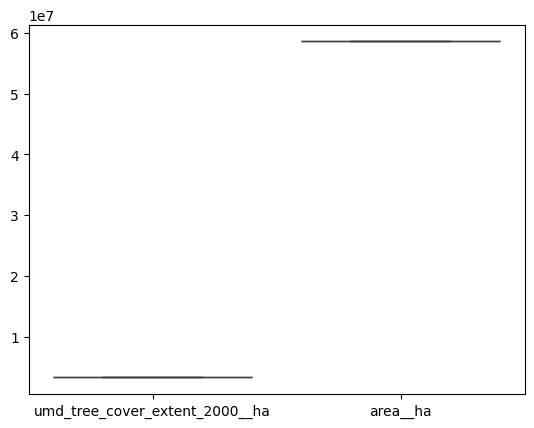

In [22]:
# Checking for Outliers Using BoxPlot 
sns.boxplot(forest_cover_extent)

<Axes: >

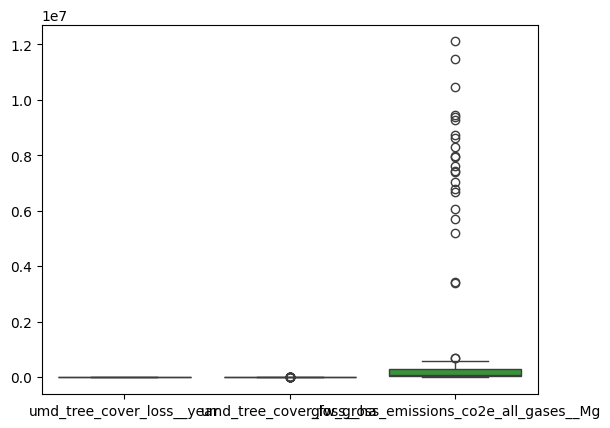

In [23]:
# Checking for Outliers using Box Plots 
sns.boxplot(forest_cover_loss)

**Note:** 
- Good News, The data lacks missing values
- However, we find that there exists outliers based on the tree cover loss but based on context of the data there exists a chance of the outliers being true values as opposed to outlier values.

#### Focuses on the Locations of tree cover loss in Kenya
- Kindly note we will merge the adm1_metadata.csv with the treecover_extent_2000_by_region_ha.csv due to the locations

In [43]:
# contains Kenya County based details
adm1_metadata = pd.read_csv("data/Forest Cover/Location of tree cover loss in Kenya/adm1_metadata.csv")
# contains Forest cover extent and loss per region
forest_cover_extent_by_region = pd.read_csv("data/Forest Cover/Location of tree cover loss in Kenya/treecover_extent_2000_by_region__ha.csv")
forest_cover_loss_by_region = pd.read_csv("data/Forest Cover/Location of tree cover loss in Kenya/treecover_loss_by_region__ha.csv")


In [55]:
# Merge DataFrames
forest_cover_extent_by_region_merged = pd.merge(forest_cover_extent_by_region, adm1_metadata, left_on='adm1', right_on='adm1__id', how='inner')

# Drop unnecessary columns
unnecessary_columns = ['adm1', 'adm1__id', 'iso']
forest_cover_extent_by_region_merged = forest_cover_extent_by_region_merged.drop(columns=unnecessary_columns)

# Reset index without inplace
forest_cover_extent_by_region_merged.reset_index(drop=True, inplace=True)

In [63]:
# Viewing the Data
forest_cover_extent_by_region_merged.head()

,umd_tree_cover_extent_2000__ha,area__ha,name
0,113989.000894,1.084248e+06,Baringo
1,120633.520455,2.378441e+05,Bomet
2,71112.041454,3.573152e+05,Bungoma
3,22038.531962,1.799546e+05,Busia
4,107098.334326,2.804070e+05,Elgeyo-Marakwet


# Extraction